## Actividade

## Os Dados

Os dados estão relacionados com o tipo de completação e características do reservatório para alguns poços. O objetivo da classificação é prever se o tipo de conclusão deve ser (1-TTP/0-Frac) com tipo de conclusão variável de destino.

Este conjunto de dados fornece informações do histórico de conclusão(completação).

#### Variáveis ​​de entrada

1 - Well - poço (categórico)

2 - Downhole Total Contribution- -Contribuição Total do Fundo de Poço (numérico)

3 - downhole Oil Rate, bopd- Taxa de Petróleo no fundo do poço, bopd (numérico)

4 - Reservoir Permeability, mD - Permeabilidade do Reservatório, mD (numérico)

5 - Thickness,ft - Espessura, pés (numérico)

6 - conductivity, md-ft- condutividade, md-ft (numérico)

#### Variável de previsão (alvo pretendido):

Completion type- Tipo de conclusão - tipo de conclusão (categórico: 'Frac','TTP(através de perfuração de tubagem)') (binário: '0','1')

#### The Above Matrix shows that Conductivity and Permeability have a correlation coefficient greater than .7 as highlighted in red 

#### Expectativas:
- Utilize o dataset fornecido para completar as tarefas de 1 a 7 abaixo, 8 dependerá de 6 e 7.
- Faça analize exploratoria das variaveis e as possiveis limpezas dos dados 
- a sua variável de destino é Completetion Key
- Faça referência aos códigos partilhados anteriormente
- aplique o que aprendeu até agora, seja criativo.


#### 1 - Renomear variáveis
renomeie os seus recursos explicativos e crie um dicionário markdown de cada um, com exceção de bem (não renomeie bem, mas inclua-o no seu dicionário)

#### 2 - Verifique a colinearidade:
Utilize uma matriz de correlação para verificar a colinearidade e decidir se pretende ou não remover uma das características correlacionadas. Espero que apoie a sua decisão. Vamos considerar valores de 0,7 como altamente correlacionados

#### 3 - Lidar com valores em falta:
a codificação pode resultar em valores em falta se uma categoria não estiver presente em todas as instâncias. Pode resolver os valores em falta, se existirem, imputando o modo, a mediana ou a média da variável ou utilizando uma biblioteca como a Impyute.

#### 4 - Dimensione os dados:
Normalizar os dados é vital para garantir que todos os recursos estão na mesma escala. se a sua equipa decidir não normalizar os dados, explique porquê

#### 5 - Treine um modelo:
Após pré-processar os dados, implemente o modelo de aprendizagem automática de regressão logística no conjunto de dados e faça as suas previsões. lembre-se que o seu alvo é... "Água"

#### 6 - Avalie o modelo:
Depois de treinar o modelo, deve avaliá-lo utilizando métricas como a exatidão, a precisão, a recordação e a pontuação F1.
interpretar as pontuações de recall e precisão nos rótulos das classes

#### 7- Matriz de confusão
Gere uma matriz de confusão e interprete-a

#### 8 - Otimizar o modelo: tarefa bónus
pode embarcar na otimização se considerar que o desempenho do modelo está abaixo do ideal

#### nota:
Idealmente, não é aconselhado a aplicar o dimensionamento de recursos antes da divisão de training/test, para que possamos evitar a fuga de informação (batota) no conjunto de testes, o que não devemos ter até que a formação esteja concluída.

In [151]:
pode usar isso como exemplo tendo em conta que o teu dataframe chama-se data:

#Rename explanatory/independent variables (Start Here)
data.rename(
    columns={"Downhole Total Contribution, %": "DH_T_Cont%",
             "downhole Oil Rate, bopd ": "Oil_Rate_bopd", 
             "Reservoir Permeability, mD ": "Permeability",
             "Thickness,ft": "Thickness",
             "conductivity, md-ft": "Conductivity"},
    inplace=True,
)
data.head()

SyntaxError: invalid syntax (956577884.py, line 1)

Deve se renomeiar a variavel alvo para Completion_type

In [ ]:
print("Before OverSampling, counts of label '1': {}".format(sum(y_train == 1)))
print("Before OverSampling, counts of label '0': {} \n".format(sum(y_train == 0)))

In [ ]:
# import SMOTE module from imblearn library. pip install imblearn, if you dont have it installed 
from imblearn.over_sampling import SMOTE 

In [ ]:
# Define the new resampled x_train and y_train, note we are only resampling the train data
sm = SMOTE(random_state = 2)
x_train_res, y_train_res = sm.fit_sample(x_train, y_train.ravel())
print("After OverSampling, counts of label '1': {}".format(sum(y_train_res == 1)))
print("After OverSampling, counts of label '0': {}".format(sum(y_train_res == 0)))

# COMEÇO

### Contexto
Na indústria de petróleo e gás, as conclusões referem-se ao processo de acabamento de um poço para que ele possa produzir petróleo ou gás. Isso envolve várias etapas, como a instalação do revestimento, a perfuração do revestimento para criar canais para o fluxo de petróleo ou gás e o fraturamento hidráulico para criar canais de fluxo adicionais. O objetivo das conclusões é maximizar a produção de petróleo ou gás de um poço.
### Descrição dos dados

Os dados estão relacionados com o tipo de completação e características do reservatório para alguns poços. O objetivo da classificação é prever se o tipo de conclusão deve ser (1-TTP/0-Frac) com tipo de conclusão variável de destino.

Este conjunto de dados fornece informações do histórico de conclusão(completação).

### Dicionario dos dados

* Well(poço): Local/região aonde se extraiu os dados;
* contribuiç_total_F_poço: Quantidade total de petróleo na região, em %
* Taxa_petróleo_no_f_poço: Taxa de Petróleo no fundo da região, em bopd
* Permeabilidade: Permeabilidade do Reservatório,em mD 
* Espessura: Espessura da região , em pés (numérico)
* Condutividade: condutividade da região, em md-ft 
* Tipo_conclusão: métodos utilizados na extração do petróleo da região; 0 = 'Frac', 1= 'TTP', variavel alvo binomial

### 1 Processo de Limpeza de Dados
**Importando bibliotecas necessárias**

In [95]:
# To filter the warnings
import warnings

warnings.filterwarnings("ignore")

# Libraries to help with reading and manipulating data
import pandas as pd
import numpy as np

# libraries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Library to split data
from sklearn.model_selection import train_test_split


# To build linear model for statistical analysis and prediction
import statsmodels.stats.api as sms
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
from statsmodels.tools.tools import add_constant

# To get diferent metric scores
from sklearn import metrics
from sklearn.metrics import accuracy_score, roc_curve, confusion_matrix, roc_auc_score


# this will help in making the Python code more structured automatically (good coding practice)
#%load_ext nb_black

**Carregando os Dados**

In [96]:
data = pd.read_csv(r"C:\Users\j040m\Music\CURSO\Modulo 2- Modelos lineares generalizados\homework\frac_data_p.csv")

**Vendo as 5 primeiras e últimas linhas do conjunto de dados**

In [19]:
data.head()

,Well,Completion type,"Downhole Total Contribution, %","downhole Oil Rate, bopd","Reservoir Permeability, mD","Thickness,ft","coCNuctivity, md-ft"
0,PN-A02,Frac,18.0,927.0,50.0,30,1500.0
1,PN-A02,Frac,43.0,2215.0,4.0,60,240.0
2,PN-A02,TTP,24.0,1236.0,32.0,20,640.0
3,PN-A02,TTP,14.0,721.0,12.0,15,180.0
4,PN-A03,TTP,1.3,27.0,16.0,5,80.0


In [20]:
data.tail()

,Well,Completion type,"Downhole Total Contribution, %","downhole Oil Rate, bopd","Reservoir Permeability, mD","Thickness,ft","coCNuctivity, md-ft"
91,CN-A01,TTP,5.2,461.0,5.2,40,208.0
92,CN-A01,TTP,2.3,320.0,0.5,28,14.0
93,CN-A01,TTP,10.2,938.0,0.5,37,18.5
94,CN-A01,TTP,1.5,318.0,0.2,16,3.2
95,CN-A01,TTP,9.3,2095.0,0.5,54,27.0


* Podemos observar que temos variaveis diferentes daquelas espelhadas pelo dicionário, neste caso temos de fazer mudanças no nome das mesmas variaveis

**Mudando o nome das variaveis**

In [97]:
#Rename explanatory/independent variables (Start Here)
data.rename(
    columns={"Downhole Total Contribution, %": "contribuiç_total_F_poço%",
             "downhole Oil Rate, bopd ": "Taxa_petróleo_no_f_poço", 
             "Reservoir Permeability, mD ": "Permeabilidade",
             "Thickness,ft": "Espessura",
             "coCNuctivity, md-ft": "Condutividade",
             "Completion type": "Tipo_conclusão",
            },
    inplace=True,
)
data.head()

,Well,Tipo_conclusão,contribuiç_total_F_poço%,Taxa_petróleo_no_f_poço,Permeabilidade,Espessura,Condutividade
0,PN-A02,Frac,18.0,927.0,50.0,30,1500.0
1,PN-A02,Frac,43.0,2215.0,4.0,60,240.0
2,PN-A02,TTP,24.0,1236.0,32.0,20,640.0
3,PN-A02,TTP,14.0,721.0,12.0,15,180.0
4,PN-A03,TTP,1.3,27.0,16.0,5,80.0


**Entendendo a forma do conjunto de dados**

In [22]:
# Verifica o shape dos dados
print(f'Shape dos dados: {data.shape}\n')
 
print(f'Esta base de dados tem {data.shape[0]} observações e {data.shape[1]} variaveis.')

Shape dos dados: (96, 7)

Esta base de dados tem 96 observações e 7 variaveis.


**Verificando os valores nulos e duplicados nos dados**

In [23]:
data.isnull().values.any()

False

In [24]:
data.duplicated().sum().any()

False

* Observa-se que não existem valores nulos e nem duplicados

**Verificando os tipos de dados das variaveis para o conjunto de dados**

In [25]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 7 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Well                      96 non-null     object 
 1   Tipo_conclusão            96 non-null     object 
 2   contribuiç_total_F_poço%  96 non-null     float64
 3   Taxa_petróleo_no_f_poço   96 non-null     float64
 4   Permeabilidade            96 non-null     float64
 5   Espessura                 96 non-null     int64  
 6   Condutividade             96 non-null     float64
dtypes: float64(4), int64(1), object(2)
memory usage: 5.4+ KB


* Há 5 variaveis numéricas(1 int e 4 float) nos dados e 2 de tipo de objeto.

**verificando o resumo estatístico dos dados.**

In [26]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
contribuiç_total_F_poço%,96.0,14.579167,20.452579,0.00,1.00,4.75,20.175,88.0
Taxa_petróleo_no_f_poço,96.0,408.477083,625.861100,0.00,20.38,127.50,456.500,2838.0
Permeabilidade,96.0,12.566667,15.795791,0.01,2.00,6.00,16.500,80.0
Espessura,96.0,27.739583,22.931589,5.00,11.75,20.00,35.000,103.0
Condutividade,96.0,316.438646,419.653895,0.36,20.60,113.00,457.500,1750.0


In [27]:
# Sumário das variaveis do tipo objeto
data.describe(include ="object")

,Well,Tipo_conclusão
count,96,96
unique,15,4
top,CN-A10,TTP
freq,15,42


In [28]:
# Verificando a quantidade de valores em todas as variavel
for i in data.columns:
    print(i,len(data[i].unique()))

Well 15
Tipo_conclusão 4
contribuiç_total_F_poço% 66
Taxa_petróleo_no_f_poço 79
Permeabilidade 45
Espessura 37
Condutividade 74


**Verificando a contagem e a porcentagem de níveis categóricos em cada variavel**

In [29]:
# Making a list of all categorical variables
cat_cols =  ['Well','Tipo_conclusão']

# Printing the count of unique categorical levels in each column
for column in cat_cols:
    print(data[column].value_counts())
    print("-" * 50)

Well
CN-A10       15
CN-A03ST1     9
PN-A03        8
CN-A07        7
CN-A01        7
PN-A07        6
PN-A10        6
PN-A18        6
CN-A04        6
CN-A09        6
PN-A06        5
PN-A02        4
PN-A14        4
CN-A12        4
PN-A09        3
Name: count, dtype: int64
--------------------------------------------------
Tipo_conclusão
TTP      42
TTP      28
Frac     23
Frac      3
Name: count, dtype: int64
--------------------------------------------------


In [30]:
# Verificando em percentagem
for column in cat_cols:
    print(data[column].value_counts(normalize=True))
    print("-" * 50)

Well
CN-A10       0.156250
CN-A03ST1    0.093750
PN-A03       0.083333
CN-A07       0.072917
CN-A01       0.072917
PN-A07       0.062500
PN-A10       0.062500
PN-A18       0.062500
CN-A04       0.062500
CN-A09       0.062500
PN-A06       0.052083
PN-A02       0.041667
PN-A14       0.041667
CN-A12       0.041667
PN-A09       0.031250
Name: proportion, dtype: float64
--------------------------------------------------
Tipo_conclusão
TTP      0.437500
TTP      0.291667
Frac     0.239583
Frac     0.031250
Name: proportion, dtype: float64
--------------------------------------------------


* Podemos notar que na variavel *tipo_conclusão*, observa-se repetição de mesmos nomes com valores distindo sendo que os mesmos devem estar a ser somados

**Solucionando repetição na variavel alvo e convertendo a mesma**

In [98]:
data['Tipo_conclusão'] = data['Tipo_conclusão'].apply(lambda x: str(x).replace("Frac","0"))
data['Tipo_conclusão'] = data['Tipo_conclusão'].apply(lambda x: str(x).replace("TTP","1"))
data['Tipo_conclusão'] = data['Tipo_conclusão'].astype(int)

* Com o uso da iteração de uma função anonima(lambda), fez se a substituição de todas as entradas corresponde a TTP por 1 e Frac por 0

In [99]:
for column in ['Tipo_conclusão']:
    print(data[column].value_counts())
    print("-" * 50)

Tipo_conclusão
1    70
0    26
Name: count, dtype: int64
--------------------------------------------------


* Agora podemos observar que a variavel alvo esta com os valores organizados e com o tipo de dados correto

# Análise exploratória de dados ##

## Análise de Dados Univariada

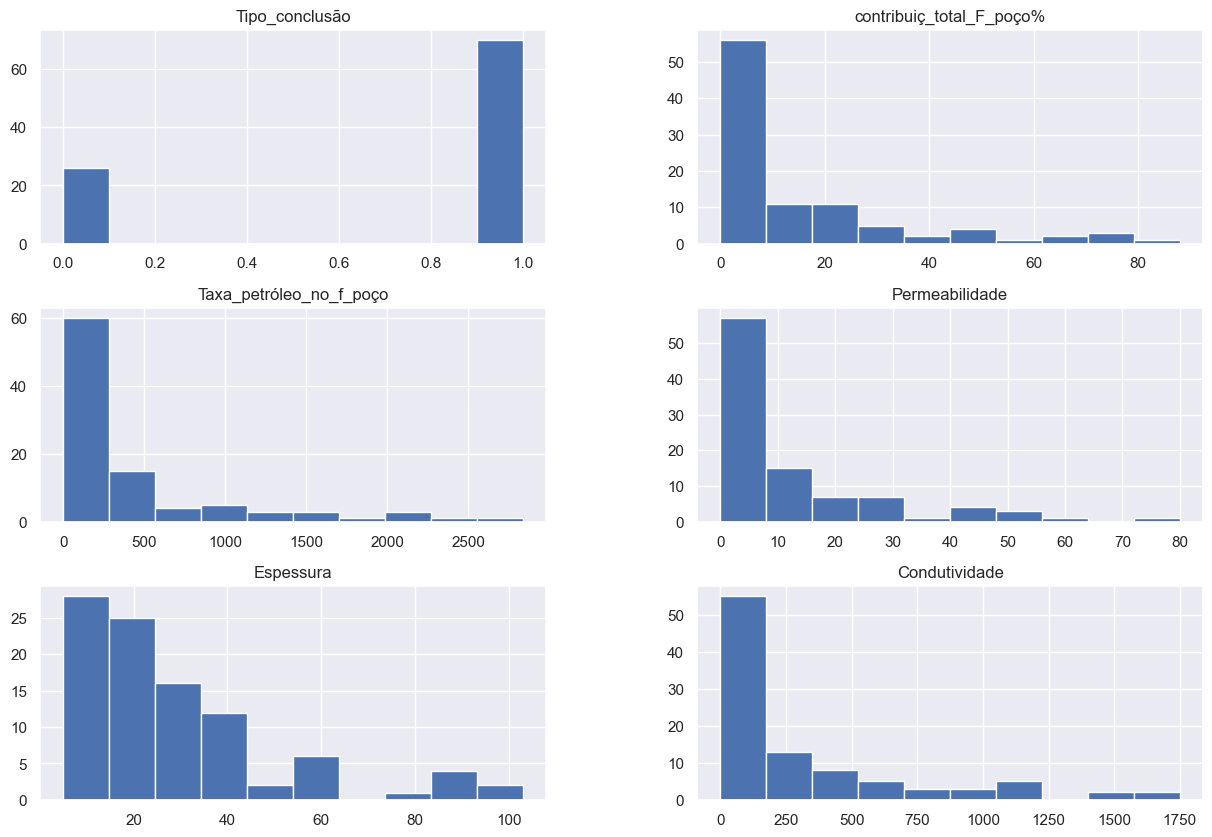

In [100]:
sns.set_style("darkgrid")
data.hist(figsize=(15, 10))
plt.show()

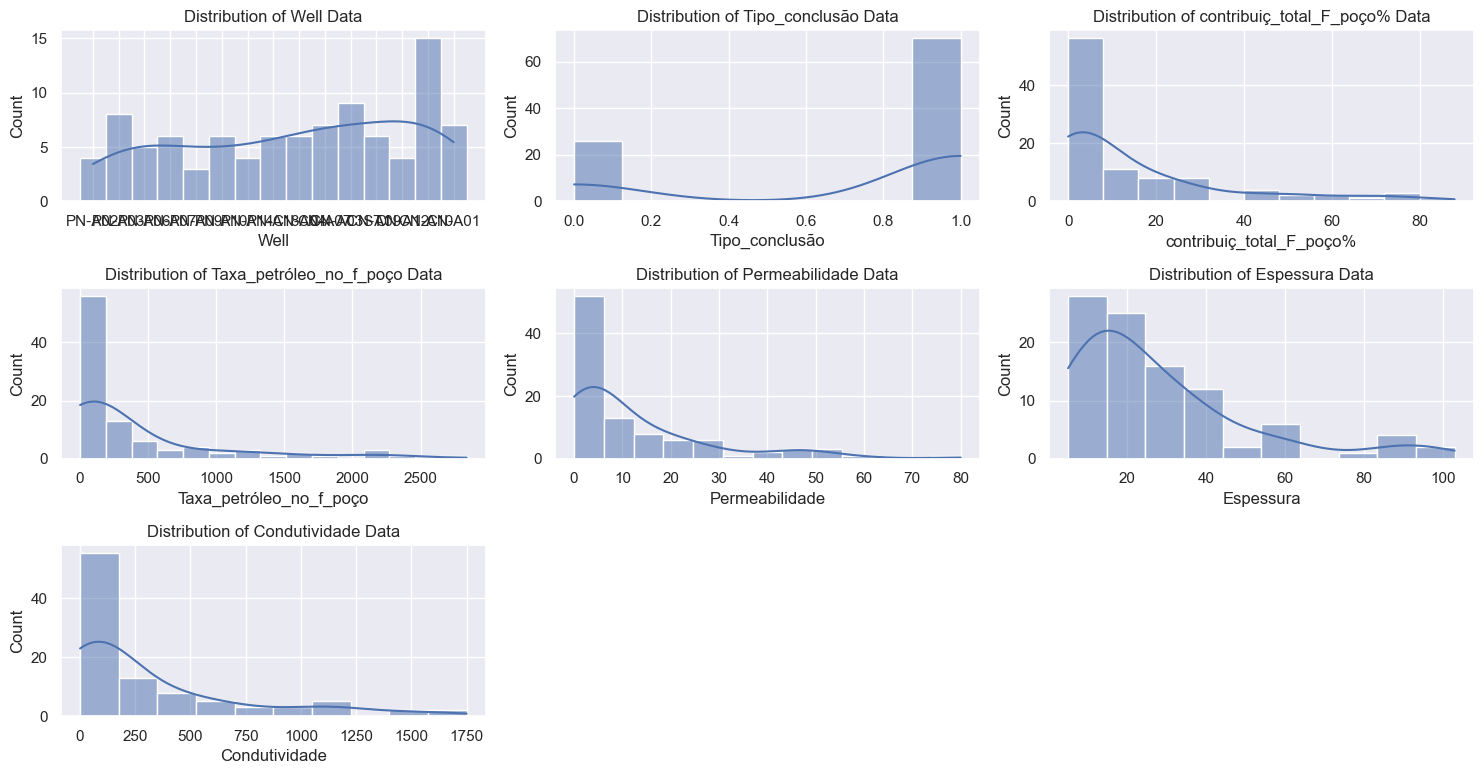

In [101]:
plt.figure(figsize=(15,10))
for i,col in enumerate(data.columns,1):
    plt.subplot(4,3,i)
    plt.title(f"Distribution of {col} Data")
    sns.histplot(data[col],kde=True)
    plt.tight_layout()
    plt.plot()
    

**Observações da contribuiç_total_F_poço**

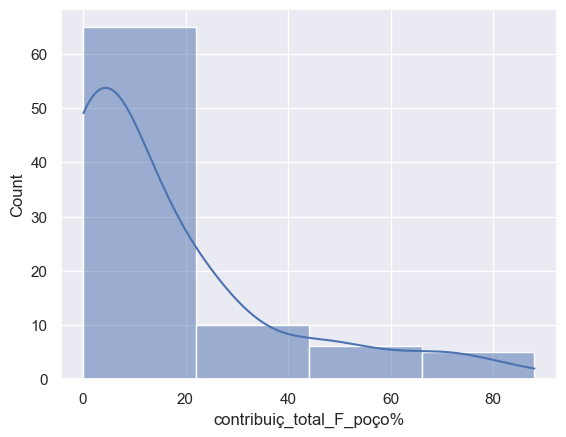

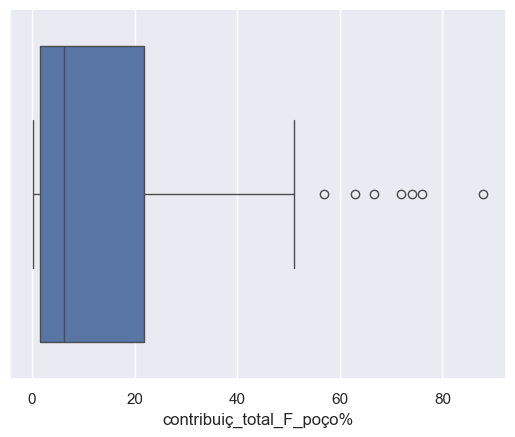

In [102]:
data_not_unrated=data[data['contribuiç_total_F_poço%']!=0]
sns.histplot(data=data_not_unrated,x='contribuiç_total_F_poço%',bins=4, stat='count', kde=True)
plt.show()
sns.boxplot(data = data_not_unrated, x='contribuiç_total_F_poço%')
plt.show()

**Observações da Taxa_petróleo_no_f_poço**

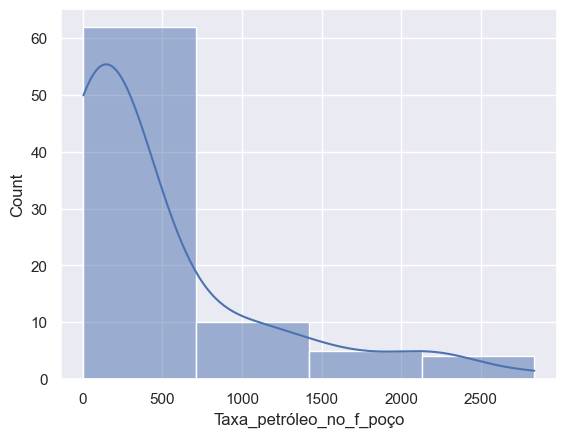

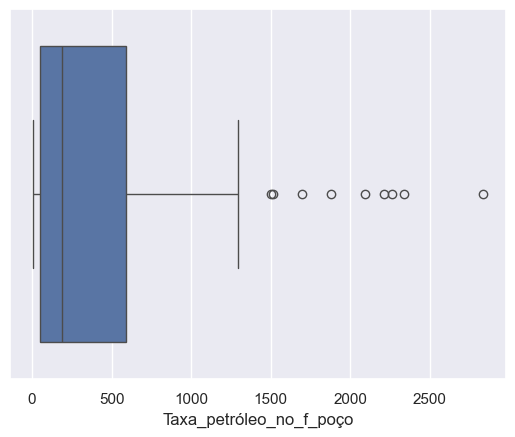

In [103]:
data_not_unrated=data[data['Taxa_petróleo_no_f_poço']!=0]

sns.histplot(data=data_not_unrated,x='Taxa_petróleo_no_f_poço',bins=4, stat='count', kde=True)
plt.show()
sns.boxplot(data = data_not_unrated, x='Taxa_petróleo_no_f_poço')
plt.show()

**Observações da Permeabilidade**

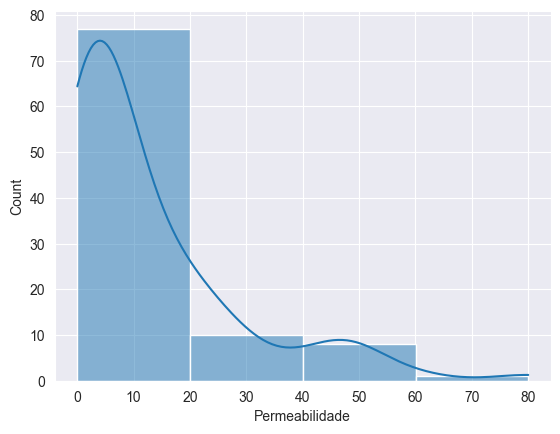

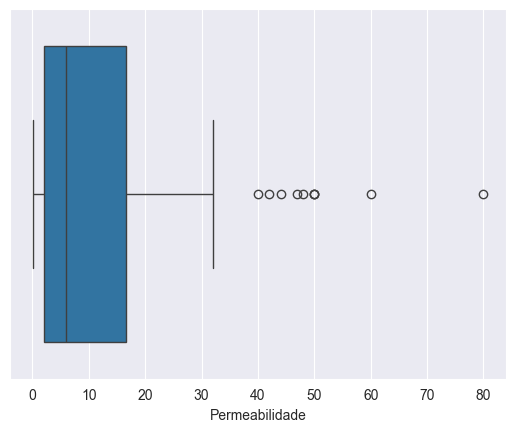

In [38]:
data_not_unrated=data[data['Permeabilidade']!=0]

sns.histplot(data=data_not_unrated,x='Permeabilidade',bins=4, stat='count', kde=True)
plt.show()
sns.boxplot(data = data_not_unrated, x='Permeabilidade')
plt.show()

**Observações da Espessura**

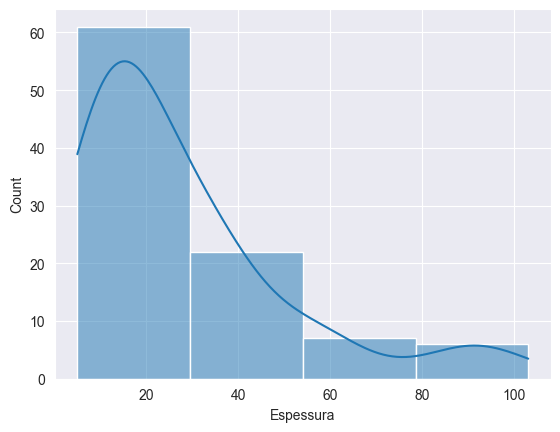

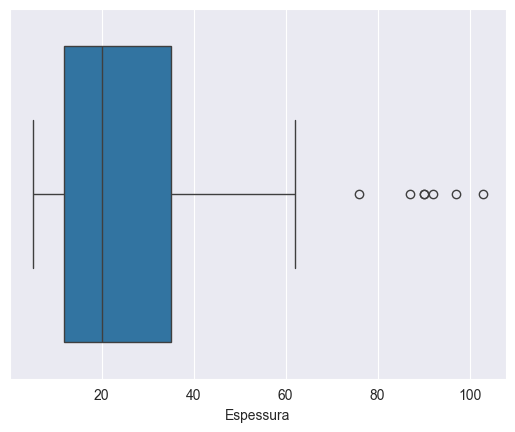

In [39]:
data_not_unrated=data[data['Espessura']!=0]

sns.histplot(data=data_not_unrated,x='Espessura',bins=4, stat='count', kde=True)
plt.show()
sns.boxplot(data = data_not_unrated, x='Espessura')
plt.show()

**Observações da Condutividade**

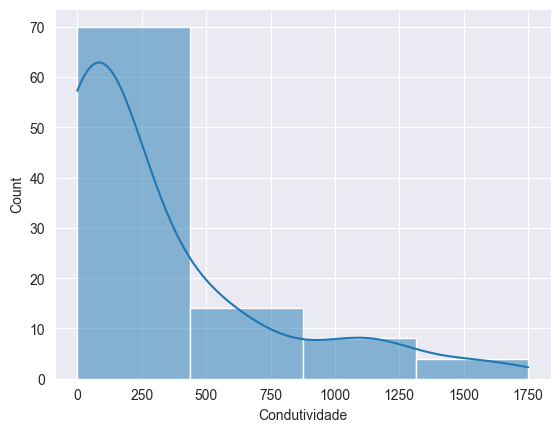

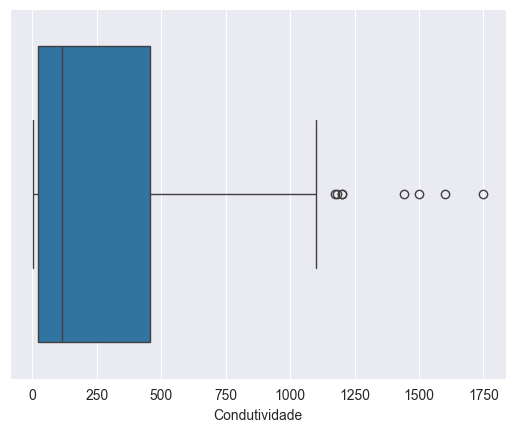

In [40]:
sns.histplot(data=data_not_unrated,x='Condutividade',bins=4, stat='count', kde=True)
plt.show()
sns.boxplot(data = data_not_unrated, x='Condutividade')
plt.show()

**Observações da Tipo_conclusão**

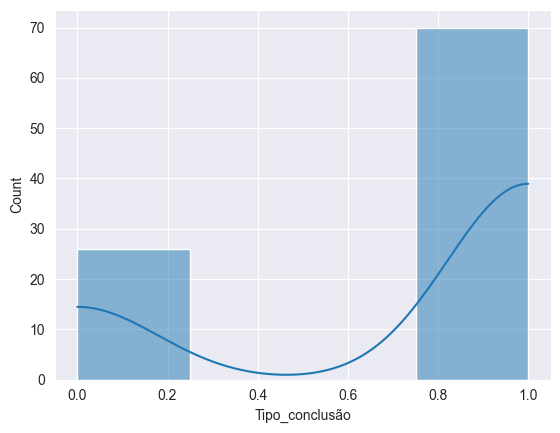

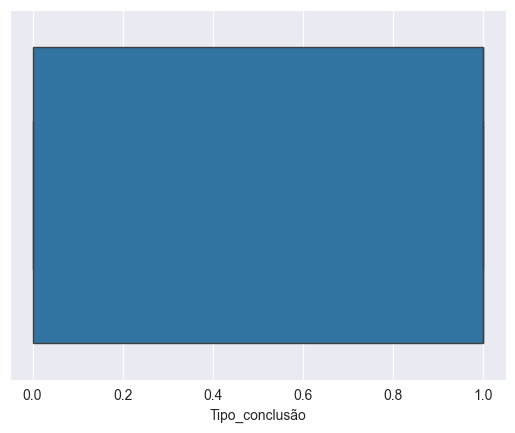

In [41]:
sns.histplot(data=data_not_unrated,x='Tipo_conclusão',bins=4, stat='count', kde=True)
plt.show()
sns.boxplot(data = data_not_unrated, x='Tipo_conclusão')
plt.show()

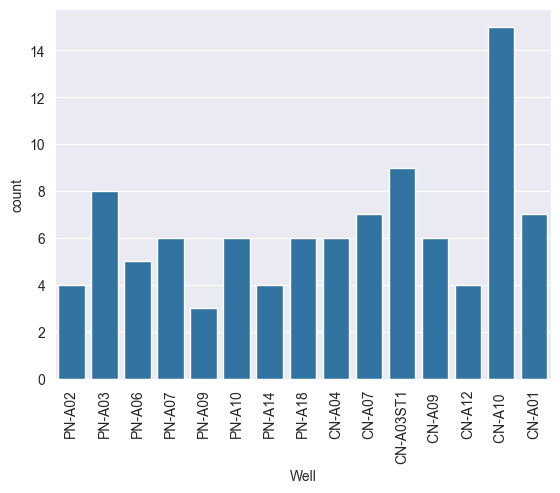

In [42]:
sns.countplot(data=data,x='Well')
plt.xticks(rotation=90)
plt.show()

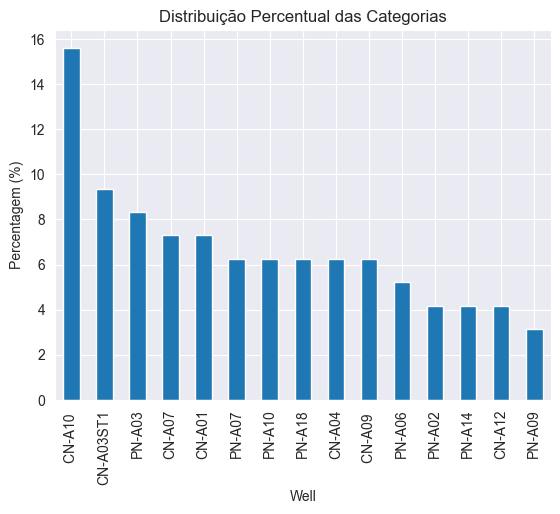

In [43]:
# Calcular as percentagens de cada categoria
percentagens = data['Well'].value_counts(normalize=True) * 100

# Plotar o gráfico de barras das percentagens
percentagens.plot(kind='bar')
plt.xlabel('Well')
plt.ylabel('Percentagem (%)')
plt.title('Distribuição Percentual das Categorias')
plt.show()

* A maior parte dos dados vêm do poço CN-A10, seguidos do poço CN-A03ST1, logo, estes serão os elementos de maior significancia nos dados

## Análise de Dados Bivariada

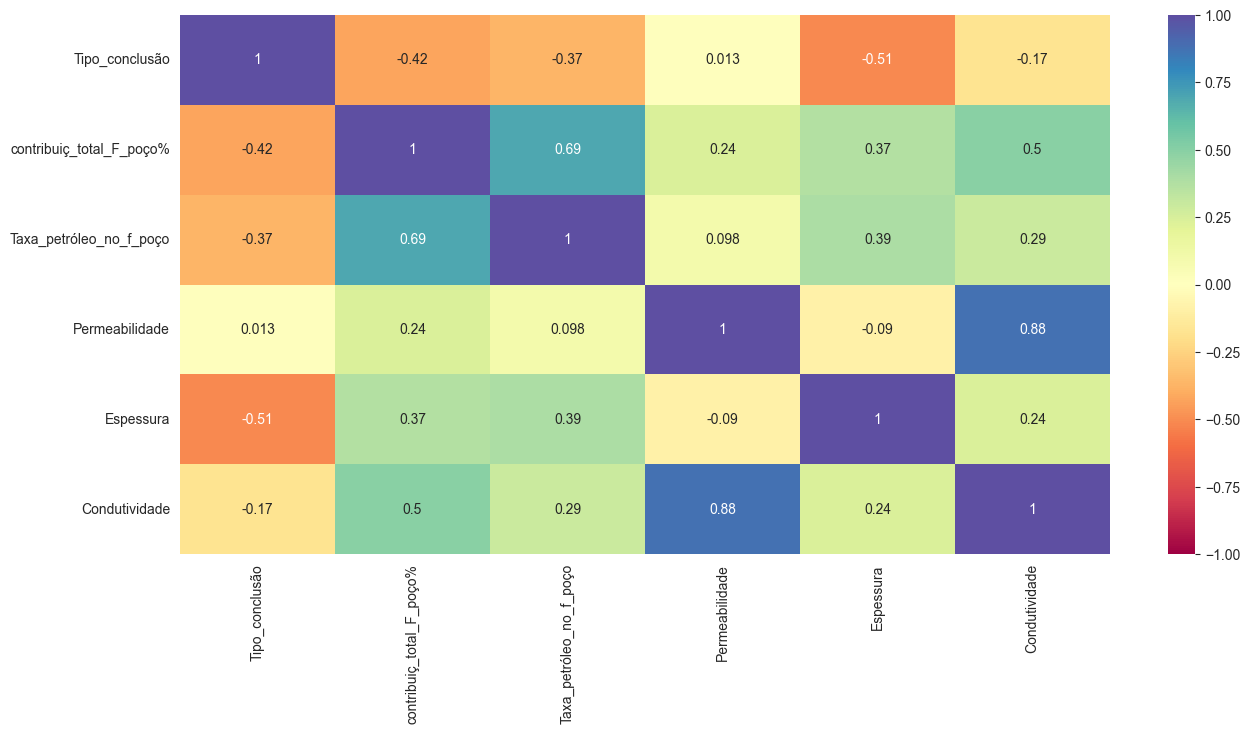

In [44]:
plt.figure(figsize=(15,7))
sns.heatmap(data.select_dtypes(include="number").corr(),annot=True,cmap='Spectral',vmin=-1,vmax=1)
plt.show()

* Podemos observar que existe casos significativos de alta correlação entre as variáveis, sendo os mesmos observavein em *Permiabilidade* - *condutividade*   

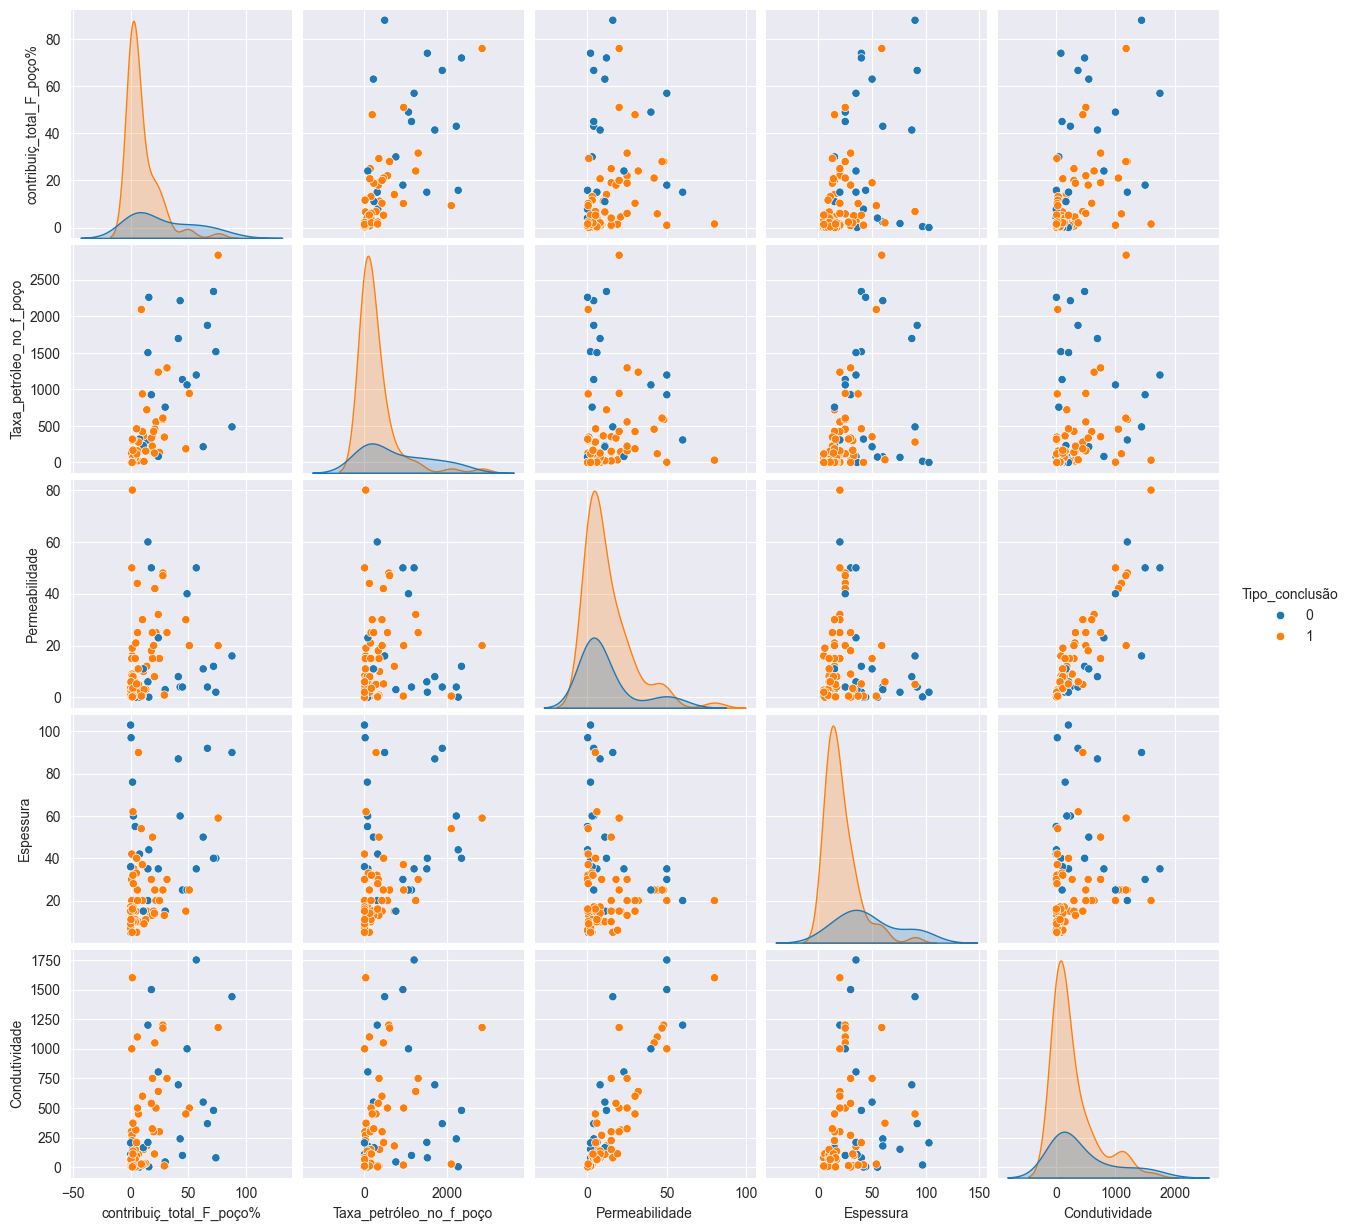

In [45]:
sns.pairplot(data, hue="Tipo_conclusão")
plt.show()

### Observando as relações/distribuição da variável alvo

In [47]:
data["Tipo_conclusão"].value_counts()

Tipo_conclusão
1    70
0    26
Name: count, dtype: int64

In [48]:
data["Tipo_conclusão"].value_counts(1)

Tipo_conclusão
1    0.729167
0    0.270833
Name: proportion, dtype: float64

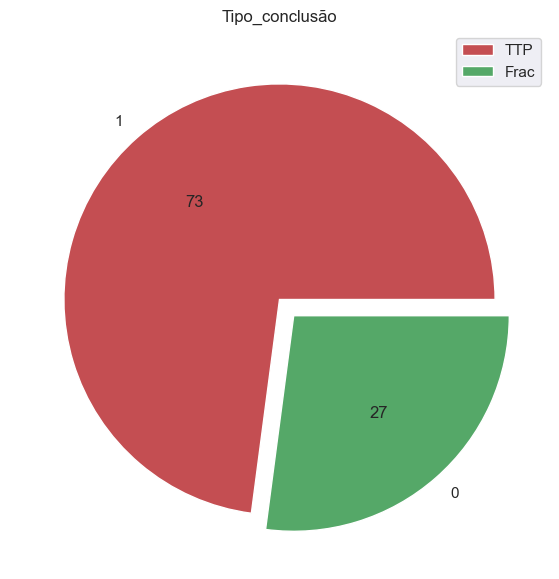

In [104]:
labels=['1','0']
count= data['Tipo_conclusão'].value_counts()
plt.figure(figsize=(15,7))
plt.pie(count,labels=labels,autopct='%.0f',explode=(0,.1), colors=['r','g'])
plt.legend( ['TTP','Frac'],loc =1)

plt.title('Tipo_conclusão')
plt.show()

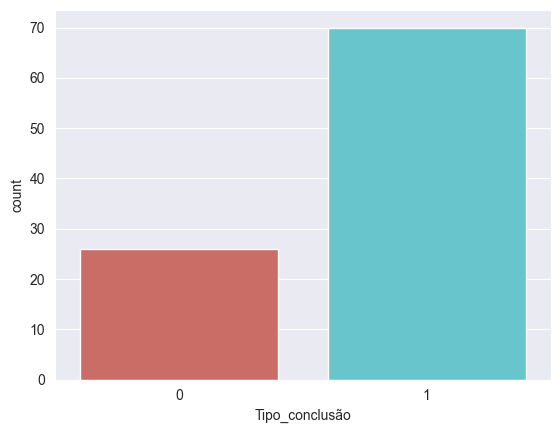

In [50]:
# Distribuição de rótulos de classe
sns.countplot(x='Tipo_conclusão',data=data, palette='hls')
plt.show()

* O número de observações em que se a conclusão se fez pelo frac é de 26, o que representa 27% do total de dados disponíveis.
 
* O número de observações em que se a conclusão se fez pelo TTP é de 70, o que representa 73% do total de dados disponíveis.

* Observa-se um desnível relevante na proporção da variavel alvo.

**Fazendo a normalização dos dados**

In [105]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

# Selecionar colunas numéricas
numeric_cols = data.select_dtypes(include=['number'])

# Criar o escalador
scaler = MinMaxScaler()

# Aplicar a normalização
numeric_cols_normalized = pd.DataFrame(scaler.fit_transform(numeric_cols), columns=numeric_cols.columns)

# Substituir as colunas numéricas no DataFrame original
data[numeric_cols.columns] = numeric_cols_normalized

print(data)


      Well  Tipo_conclusão  contribuiç_total_F_poço%  Taxa_petróleo_no_f_poço  \
0   PN-A02             0.0                  0.204545                 0.326638   
1   PN-A02             0.0                  0.488636                 0.780479   
2   PN-A02             1.0                  0.272727                 0.435518   
3   PN-A02             1.0                  0.159091                 0.254052   
4   PN-A03             1.0                  0.014773                 0.009514   
..     ...             ...                       ...                      ...   
91  CN-A01             1.0                  0.059091                 0.162438   
92  CN-A01             1.0                  0.026136                 0.112755   
93  CN-A01             1.0                  0.115909                 0.330514   
94  CN-A01             1.0                  0.017045                 0.112051   
95  CN-A01             1.0                  0.105682                 0.738196   

    Permeabilidade  Espessu

* Todos os dados numericos estão normalizados com um valor maximo de 1 e minimo de 0

**Observações do Tipo_conclusão com relação ao contribuic_Total_F_poço%**

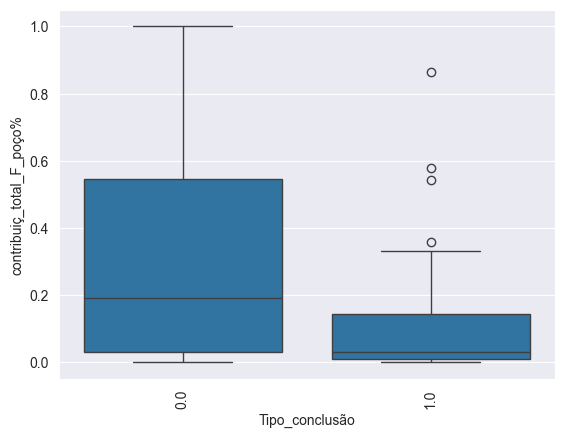

In [53]:
sns.boxplot(data=data,y='contribuiç_total_F_poço%',x='Tipo_conclusão')
plt.xticks(rotation=90)
plt.show()

* Os poços completados por Frac, tiveram uma banda maior com relação a completações de poços por TTP a nível da contribuição total no poço.
* Os poços completados por TTP tem um valor médio próximo de 0.025.

**Observações do Tipo_conclusão com relação ao Taxa_petróleo_no_f_poço %**

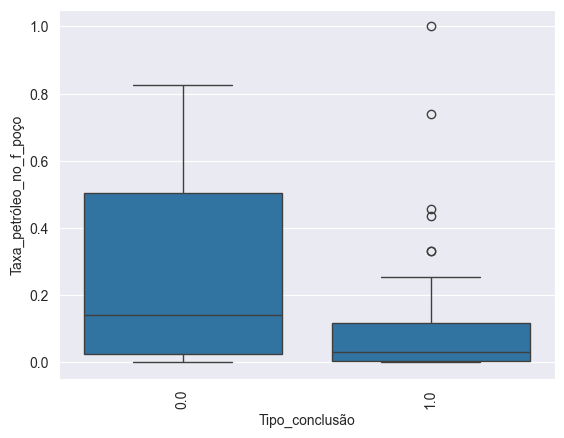

In [54]:
sns.boxplot(data=data,y='Taxa_petróleo_no_f_poço',x='Tipo_conclusão')
plt.xticks(rotation=90)
plt.show()

* Os poços completados por TTP possuem um nivel médio de taxa de petroleo de 0.025
* Os poços completados por Frac tem um nível médio de taxa de petroleo em torno de 0.15 podendo no máximo chegar até 0.5.
* Os poços completados por Frac, possuem uma faixa mais ampla de víveis de taxa de petroleo com relação a aqueles que foram completados por TTP 

**Observações do Tipo_conclusão com relação ao Permeabilidade %**

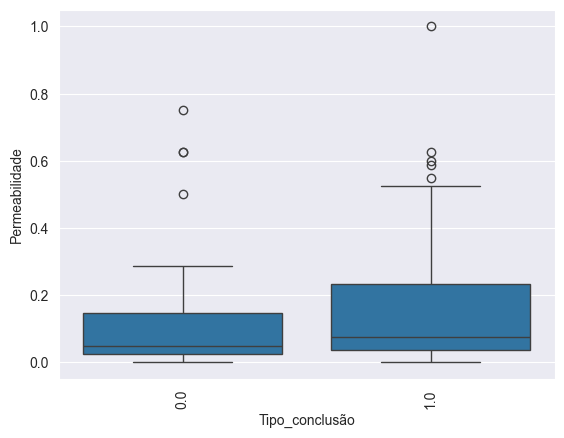

In [55]:
sns.boxplot(data=data,y='Permeabilidade',x='Tipo_conclusão')
plt.xticks(rotation=90)
plt.show()

* Os poços completados por TTP têm uma faixa mais ampla de níveis de permiabilidade com relação aos poços completados por Frac
* Os poços completados por Frac tem um nível médio de taxa de petroleo em torno de 0.025

**Observações do Tipo_conclusão com relação ao Espessura %**

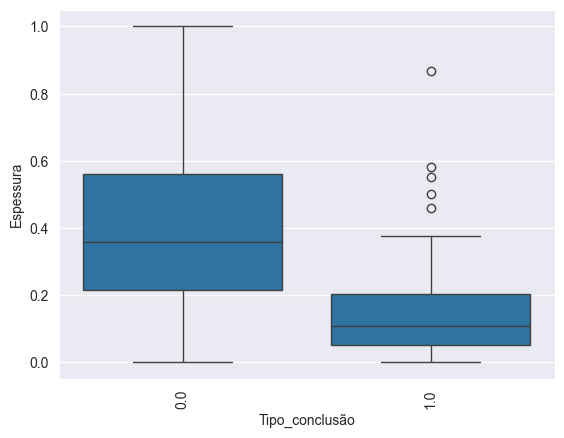

In [56]:
sns.boxplot(data=data,y='Espessura',x='Tipo_conclusão')
plt.xticks(rotation=90)
plt.show()

* A espessura é um fator significativo na prevalência da completação com Frac, quantos mais espesso for maior a conveniencia de adotar a completação por Frac e caso contrário se torna verdade para a completação em TTP.

* Para as entradas com completações Frac, a média é bem maior com relação aos dados com a completação TTP a nível da espessura.


**Observações do Tipo_conclusão com relação ao Condutividade**

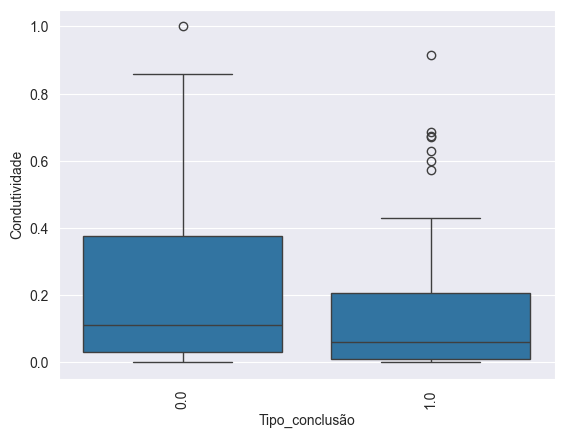

In [57]:
sns.boxplot(data=data,y='Condutividade',x='Tipo_conclusão')
plt.xticks(rotation=90)
plt.show()

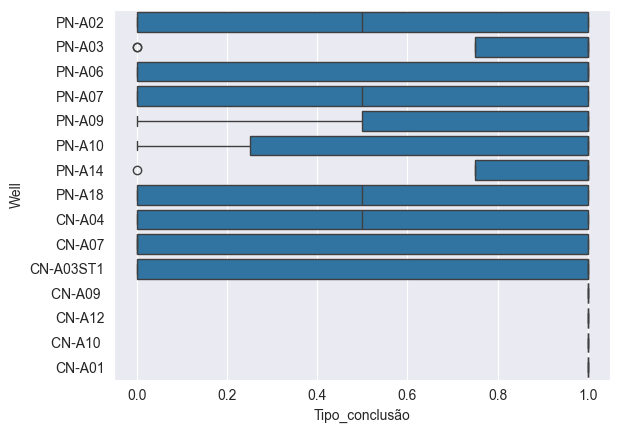

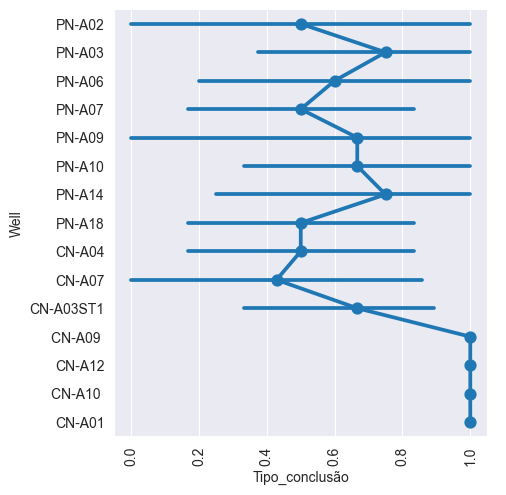

In [58]:
sns.boxplot(data=data_not_unrated,x='Tipo_conclusão',y='Well')
plt.show()
sns.catplot(data = data, x = 'Tipo_conclusão',y = 'Well',kind = 'point')
plt.xticks(rotation=90)
plt.show()

In [59]:
# Calcular a percentagem de cada categoria em relação à variável binária
percentagens = data.groupby('Tipo_conclusão')['Well'].value_counts(normalize=True).unstack() * 100

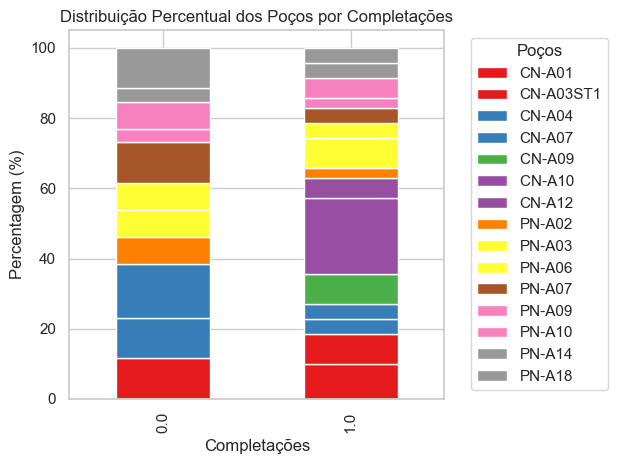

In [106]:
# Configurar o estilo do gráfico
sns.set(style="whitegrid")

# Plotar o gráfico de barras empilhadas
percentagens.plot(kind='bar', stacked=True, colormap='Set1')

plt.xlabel('Completações')
plt.ylabel('Percentagem (%)')
plt.title('Distribuição Percentual dos Poços por Completações')
plt.legend(title='Poços', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()  # Ajusta o layout para não cortar legendas
plt.show()

**Dividindo os Dados em Conjunto de Treinamento e Teste**

In [107]:
#dado=data.drop(["Condutividade"], axis=1)
X = data.drop(["Tipo_conclusão"], axis=1)
Y = data["Tipo_conclusão"]

# adicionando uma constante à variável X
X = add_constant(X)

# criando manequins
X = pd.get_dummies(X, drop_first=True, dtype = int)


# Dividindo dados em conjuntos de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(
    X, Y, test_size=0.30, random_state=1, stratify=Y
)

**Criando e ajustando o modelo de regressão logística**

In [108]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(random_state = 16,C=10,penalty= 'l2', solver='saga')

# ajuste o modelo com dados
lg= logreg.fit(X_train, y_train,sample_weight=2)

y_pred = logreg.predict(X_test)


In [109]:
# prevendo no conjunto de treinamento
# o limite padrão é 0,5, se a probabilidade prevista for...
#... maior que 0,5 a observação será classificada como 1
pred_train = lg.predict(X_train) > 0.5
pred_train = np.round(pred_train)

In [110]:
# imprimindo o resumo da regressão logística
logreg

LogisticRegression(C=10, random_state=16, solver='saga')

**Observando a matriz de confusão no conjunto de treinamento**

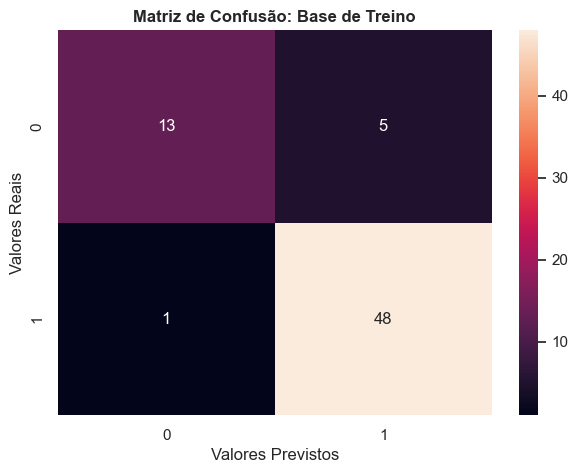

In [111]:
cm = confusion_matrix(y_train, pred_train)
plt.figure(figsize=(7, 5))
sns.heatmap(cm, annot=True, fmt="g")
plt.title('Matriz de Confusão: Base de Treino', weight='bold')
plt.xlabel("Valores Previstos")
plt.ylabel("Valores Reais")
plt.show()

**Verificando o modelo de precisão**

In [112]:
#print("Acurácia no conjunto de treinamento : ", accuracy_score(y_train, pred_train))
accuracy=accuracy_score(y_train, pred_train)
print("Acurácia no conjunto de treinamento:",(accuracy*100),'%')

Acurácia no conjunto de treinamento: 91.04477611940298 %


**Verificando a multicolinearidade**

In [113]:
# vamos verificar o VIF dos preditores
vif_series = pd.Series(
    [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])],
    index=X_train.columns,
    dtype=float,
)
print("VIF values: \n\n{}\n".format(vif_series))

VIF values: 

const                       19.147222
contribuiç_total_F_poço%     4.461458
Taxa_petróleo_no_f_poço      5.591265
Permeabilidade              16.129885
Espessura                    3.332185
Condutividade               15.948582
Well_CN-A03ST1               2.729934
Well_CN-A04                  1.735589
Well_CN-A07                  2.730882
Well_CN-A09                  2.349514
Well_CN-A10                  3.286118
Well_CN-A12                  2.104302
Well_PN-A02                  1.410906
Well_PN-A03                  3.313444
Well_PN-A06                  1.602247
Well_PN-A07                  1.939401
Well_PN-A09                  1.445365
Well_PN-A10                  2.108159
Well_PN-A14                  1.790457
Well_PN-A18                  2.175418
dtype: float64



* Observamos que há multicolinearidade presente nos dados.
* Portanto, os valores do coeficiente e dos valores de p são confiáveis.
* Tendo em conta que, um VIF menor que 5 indica uma baixa correlação desse preditor com outros preditores. Um valor entre 5 e 10 indica uma correlação moderada, enquanto valores de VIF maiores que 10 são um sinal de correlação alta e não tolerável dos preditores do modelo
* Sendo os mesmos observavein em *Permiabilidade* - *condutividade*

**Tratando da alta correlação**

**Observações do Condutividade com relação a Permeabilidade**

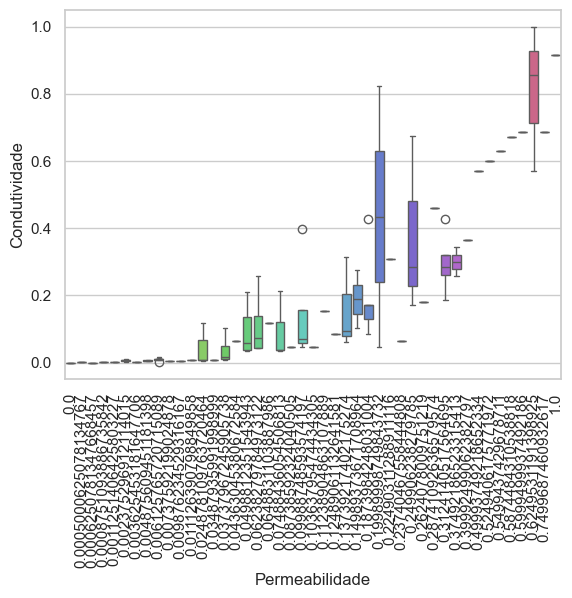

In [114]:
sns.boxplot(data=data,x='Permeabilidade',y='Condutividade',palette='hls')
plt.xticks(rotation=90)
plt.show()

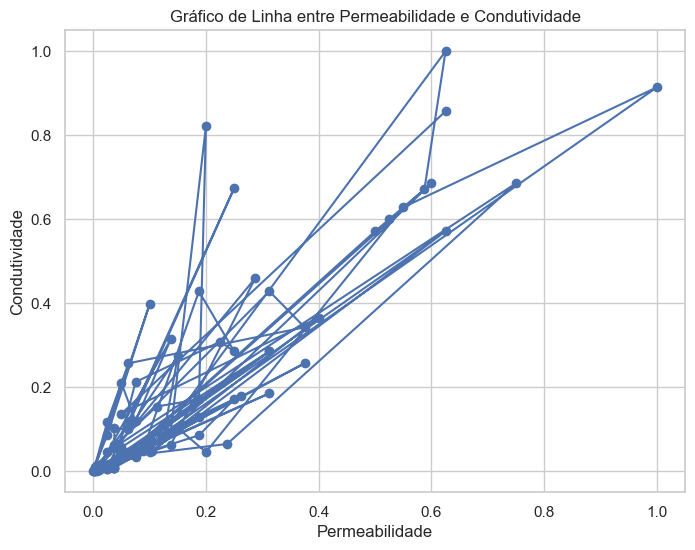

In [73]:
plt.figure(figsize=(8, 6))
plt.plot(data['Permeabilidade'], data['Condutividade'], marker='o')
plt.xlabel('Permeabilidade')
plt.ylabel('Condutividade')
plt.title('Gráfico de Linha entre Permeabilidade e Condutividade')
plt.grid(True)
plt.show()

 * Tendo em conta que, em geofísica e engenharia de petróleo, a permeabilidade dos solos e rochas afeta a capacidade de conduzir fluidos, o que pode ter implicações indiretas na condutividade, pois fluidos condutores podem alterar a condutividade elétrica do material. Portando segundo os dados fornecidos, a permiabilidade e condutividade estão quase que linearmente relacionados, o que nos leva a remoção de uma das variaveis, foco a reduzir o fator de VIF

In [115]:
dado=data.drop(["Permeabilidade"], axis=1)
X = dado.drop(["Tipo_conclusão"], axis=1)
X = add_constant(X)
X = pd.get_dummies(X, drop_first=True, dtype = int)
X_train, X_test, y_train, y_test = train_test_split(
    X, Y, test_size=0.30, random_state=1, stratify=Y)
logreg = LogisticRegression(random_state = 16,C=10,penalty= 'l2')
lg= logreg.fit(X_train, y_train,sample_weight=2)
y_pred = logreg.predict(X_test)
pred_train = lg.predict(X_train) > 0.5
pred_train = np.round(pred_train)
vif_series = pd.Series(
    [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])],
    index=X_train.columns,
    dtype=float,
)
print("VIF values: \n\n{}\n".format(vif_series))

VIF values: 

const                       19.125252
contribuiç_total_F_poço%     3.979195
Taxa_petróleo_no_f_poço      5.588543
Espessura                    3.083207
Condutividade                1.712996
Well_CN-A03ST1               2.724056
Well_CN-A04                  1.709780
Well_CN-A07                  2.730590
Well_CN-A09                  2.157642
Well_CN-A10                  3.245515
Well_CN-A12                  1.945990
Well_PN-A02                  1.410049
Well_PN-A03                  2.751332
Well_PN-A06                  1.499616
Well_PN-A07                  1.819229
Well_PN-A09                  1.390967
Well_PN-A10                  1.977105
Well_PN-A14                  1.717329
Well_PN-A18                  2.111771
dtype: float64



In [116]:
accuracy=accuracy_score(y_train, pred_train)
print("Acurácia no conjunto de treinamento:",(accuracy*100),'%')

Acurácia no conjunto de treinamento: 91.04477611940298 %


* Podemos observar uma significativa diminuição do VIF entre as variaveis.
* Porém essa alteração não melhorou a acurácia do modelo

**ROC-AUC em conjunto de treinamento**

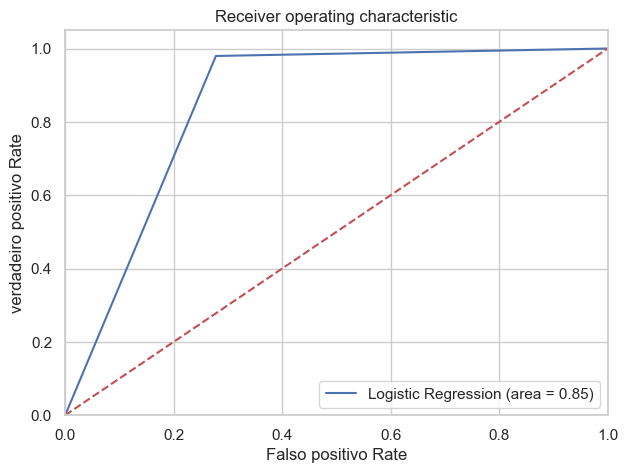

In [117]:
logit_roc_auc_train = roc_auc_score(y_train, lg.predict(X_train))
fpr, tpr, thresholds = roc_curve(y_train, lg.predict(X_train))
plt.figure(figsize=(7, 5))
plt.plot(fpr, tpr, label="Logistic Regression (area = %0.2f)" % logit_roc_auc_train)
plt.plot([0, 1], [0, 1], "r--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("Falso positivo Rate")
plt.ylabel("verdadeiro positivo Rate")
plt.title("Receiver operating characteristic")
plt.legend(loc="lower right")
plt.show()

* O modelo apresenta um bom desempenho no conjunto de treinamento.

**Fazendo previsões sobre os dados de teste.**

In [118]:
pred_test = lg.predict(X_test) > 0.5
pred_test = np.round(pred_test)

In [119]:
pred_test

array([1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1.,
       1., 1., 0., 1., 1., 0., 1., 1., 1., 0., 1., 1.], dtype=float16)

In [120]:
#print("Accuracy on training set : ", accuracy_score(y_train, pred_train))
accuracy=accuracy_score(y_train, pred_train)
print("Acurácia no conjunto de treinamento:",(accuracy*100),'%')

#print("Accuracy on test set : ", accuracy_score(y_test, pred_test))
accuracy1=accuracy_score(y_test, pred_test)
print("Acurácia no conjunto de teste:",(accuracy1*100),'%')

Acurácia no conjunto de treinamento: 91.04477611940298 %
Acurácia no conjunto de teste: 75.86206896551724 %


* A regressão logística apresenta bom desempenhoo nos conjuntos de treinamento e teste.

In [121]:
from sklearn.metrics import classification_report
target_names = ['Frac', 'TTP']
print(classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

        Frac       0.60      0.38      0.46         8
         TTP       0.79      0.90      0.84        21

    accuracy                           0.76        29
   macro avg       0.70      0.64      0.65        29
weighted avg       0.74      0.76      0.74        29



<Axes: ylabel='Feature'>

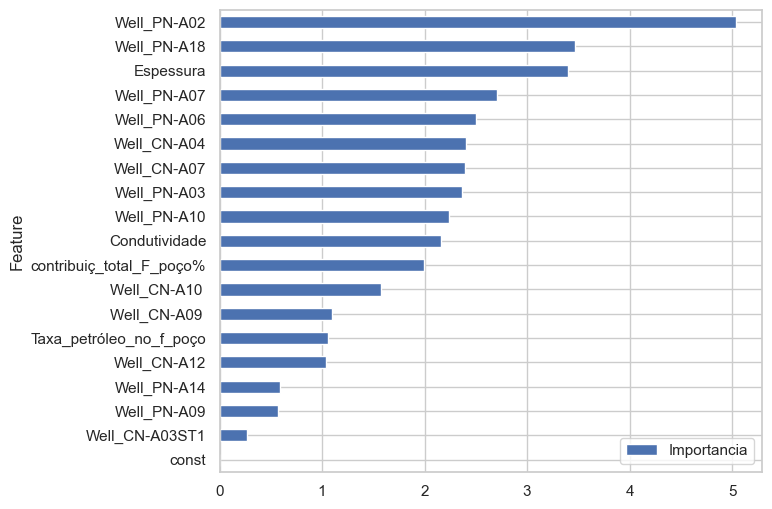

In [122]:
coefficients = logreg.coef_[0]

feature_importance = pd.DataFrame({'Feature': X.columns, 'Importancia': np.abs(coefficients)})
feature_importance = feature_importance.sort_values('Importancia', ascending=True)
feature_importance.plot(x='Feature', y='Importancia', kind='barh', figsize=(7, 6))

## Conclusões sobre o trabalho de regressão Logística  
* O modelo foi treinado com sucesso. A Acurácia nos diz que o nosso modelo consegue acertar em torno de 91% das predições.
